In [28]:
import os
import pandas as pd
import numpy as np
import re 
import tabula
import matplotlib.pyplot as plt
import seaborn as sns

## Table 1 2000-2018

In [2]:
df_00 = tabula.read_pdf("2000.pdf", pages='11-12')
t1_00 = df_00[0]
t2_00 = df_00[1]

df_01 = tabula.read_pdf("2001.pdf", pages='13-14')
t1_01 = df_01[0]
t2_01 = df_01[1]

df_02 = tabula.read_pdf("2002.pdf", pages='13-14')
t1_02 = df_02[0]
t2_02 = df_02[1]

df_03 = tabula.read_pdf("2003.pdf", pages='15-16')
t1_03 = df_03[0]
t2_03 = df_03[1]

Got stderr: Feb 24, 2020 11:14:30 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Feb 24, 2020 11:14:30 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Feb 24, 2020 11:14:30 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Feb 24, 2020 11:14:31 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Feb 24, 2020 11:14:31 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Feb 24, 2020 11:14:31 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode

Got stderr: Feb 24, 2020 11:14:38 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Feb 24, 2020 11:14:38 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Feb 24, 2020 11:14:38 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Feb 24, 2020 11:14:38 PM org.apache.pdfbox.rendering.CIDType0Glyph2D getPathForCharacterCode
Feb 24, 2020 11:14:38 PM org.apache.pdfbox.re

In [3]:
#cleaning table 1
early_years = [t1_00, t1_01, t1_02]
for index, df in enumerate(early_years):
    early_years[index] = df.rename(columns={"Incidents, Offenses, Victims, and Known Offenders": "Bias motivation", "Unnamed: 0": "Offenses", 
                  "Unnamed: 1": "Victims", "Unnamed: 2": "Known Offenders"}) #missing incidents
    early_years[index] = early_years[index].loc[6:30, :]
    early_years[index]['Bias motivation'] = early_years[index]['Bias motivation'].str.replace('\d+', '')
#     early_years[index]['Bias motivation'] = early_years[index]['Bias motivation'].str.replace(',', '')
    early_years[index] = early_years[index].set_index("Bias motivation")
    early_years[index] = early_years[index].drop([early_years[index].index[5], early_years[index].index[13],
                                                  early_years[index].index[-3], early_years[index].index[-6]])
    early_years[index] = early_years[index].replace(',','', regex=True)

[t1_00, t1_01, t1_02] = early_years

In [4]:
t1_03 = t1_03.rename(columns={"Incidents, Offenses, Victims, and Known Offenders": "Bias motivation", "Unnamed: 0": "Offenses", 
                  "Unnamed: 1": "Victims", "Unnamed: 2": "Known Offenders"})
t1_03 = t1_03.loc[5:31, :]
t1_03['Bias motivation'] = t1_03['Bias motivation'].str.replace('\d+', '')
# t1_03['Bias motivation'] = t1_03['Bias motivation'].str.replace(',', '')
t1_03 = t1_03.replace(',','', regex=True)

t1_03 = t1_03.set_index('Bias motivation')

#dropping additional rows that are unncessary 
t1_03 = t1_03.drop(t1_03.index[14])
t1_03 = t1_03.drop(t1_03.index[6])
t1_03 = t1_03.drop(t1_03.index[-7])
t1_03 = t1_03.drop(t1_03.index[-3])
t1_03 = t1_03.drop(t1_03.index[2])
t1_03 = t1_03.drop(t1_03.index[-4])

In [5]:
#renaming 2 indices that were cut off 
as_list = t1_03.index.tolist()
idx = as_list.index('Alaskan Native ')
as_list[idx] = 'Anti-American Indian/Alaskan Native'
t1_03.index = as_list

as_list1 = t1_03.index.tolist()
idx1 = as_list1.index('National Origin ')
as_list1[idx1] = 'Anti-Other Ethnicity/National Origin'
t1_03.index = as_list1


In [6]:
incidents_00 = ['875', '2884', '57', '281', '240', '1109', '56', '59', '28', '172', '44', '4', '896', '179',
               '182', '22', '20', '557', '354', '20', '16']
t1_00['Incidents'] = incidents_00
t1_00 = t1_00[['Incidents', 'Offenses', 'Victims', 'Known Offenders']]

incidents_01 = ['891', '2899', '80', '280', '217', '1043', '38', '35', '481', '181', '45', '5', '980', '205',
                '173', '18', '17', '597', '1501', '12','23']
t1_01['Incidents'] = incidents_01
t1_01 = t1_01[['Incidents', 'Offenses', 'Victims', 'Known Offenders']]

incidents_02 = ['719', '2486', '62', '217', '158', '931', '53', '55', '155', '198', '31', '3', '825', '172', '222',
               '10', '15', '480', '622', '20', '25']
t1_02['Incidents'] = incidents_02
t1_02 = t1_02[['Incidents', 'Offenses', 'Victims', 'Known Offenders']]

incidents_03 = ['830', '2548', '76', '231', '159', '927', '76', '49', '149', '109', '24', '9', '783', '187', '247', 
               '14', '8', '426', '600', '24', '9']
t1_03['Incidents'] = incidents_03
t1_03 = t1_03[['Incidents', 'Offenses', 'Victims', 'Known Offenders']]

In [7]:
#loading in the datasets

#table 1 
t1_04 = pd.read_excel('2004/Table1.xls')
t1_05 = pd.read_excel('2005/Table1.xls')
t1_06 = pd.read_excel('2006/Table1.xls')
t1_07 = pd.read_excel('2007/Table1.xls')
t1_08 = pd.read_excel('2008/Table1.xls')
t1_09 = pd.read_excel('2009/Table 1.xls')
t1_10 = pd.read_excel('2010/Table1.xls')
t1_11 = pd.read_excel('2011/Table1.xls')
t1_12 = pd.read_excel('2012/Table1.xls')
t1_13 = pd.read_excel('2013/Table1.xls')
t1_14 = pd.read_excel('2014/Table1.xls')
t1_15 = pd.read_excel('2015/Table1.xls')
t1_16 = pd.read_excel('2016/Table1.xls')
t1_17 = pd.read_excel('2017/Table1.xls')
t1_18 = pd.read_excel('2018/Table1.xls')

#table 2 
t2_04 = pd.read_excel('2004/Table2.xls')
t2_05 = pd.read_excel('2005/Table2.xls')
t2_06 = pd.read_excel('2006/Table2.xls')
t2_07 = pd.read_excel('2007/Table2.xls')
t2_08 = pd.read_excel('2008/Table2.xls')
t2_09 = pd.read_excel('2009/Table 2.xls')
t2_10 = pd.read_excel('2010/Table2.xls')
t2_11 = pd.read_excel('2011/Table2.xls')
t2_12 = pd.read_excel('2012/Table2.xls')
t2_13 = pd.read_excel('2013/Table2.xls')
t2_14 = pd.read_excel('2014/Table2.xls')
t2_15 = pd.read_excel('2015/Table2.xls')
t2_16 = pd.read_excel('2016/Table2.xls')
t2_17 = pd.read_excel('2017/Table2.xls')
t2_18 = pd.read_excel('2018/Table2.xls')



In [8]:
#cleaning table 1
table1 = [t1_04, t1_05, t1_06, t1_07, t1_08, t1_09]
for index, df in enumerate(table1):
    table1[index] = df.rename(columns={"Table 1": "Bias motivation", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders"})
    table1[index] = table1[index].loc[5:30, :].set_index('Bias motivation')
    table1[index] = table1[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
[t1_04, t1_05, t1_06, t1_07, t1_08, t1_09] = table1

In [9]:
#cleaning table 1
table1 = [t1_11, t1_12]
for index, df in enumerate(table1):
    table1[index] = df.rename(columns={"Table 1 ": "Bias motivation", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders"})
    table1[index] = table1[index].loc[6:30, :].set_index('Bias motivation')
    table1[index] = table1[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
    table1[index] = table1[index].replace(',','', regex=True)

[t1_11, t1_12] = table1


In [10]:
#cleaning table 1
table1 = [t1_10]
for index, df in enumerate(table1):
    table1[index] = df.rename(columns={"Table 1 ": "Bias motivation", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders"})
    table1[index] = table1[index].loc[5:29, :].set_index('Bias motivation')
    table1[index] = table1[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
    table1[index] = table1[index].replace(',','', regex=True)

[t1_10] = table1


In [11]:
#drop columns in tables
table1_2 = [t1_10, t1_11, t1_12]
for index, df in enumerate(table1_2):
    df = df.drop([df.index[5], df.index[13], df.index[-4], df.index[-7]])
    table1_2[index] = df
[t1_10, t1_11, t1_12] = table1_2

In [12]:
#dropping rows that are not needed (the totals)
t1_04 = t1_04.drop(t1_04.index[5])
t1_04 = t1_04.drop(t1_04.index[12])
t1_04 = t1_04.drop(t1_04.index[-4])
t1_04 = t1_04.drop(t1_04.index[-6])

t1_05 = t1_05.drop(t1_05.index[5])
t1_05 = t1_05.drop(t1_05.index[12])
t1_05 = t1_05.drop(t1_05.index[-4])
t1_05 = t1_05.drop(t1_05.index[-6])

t1_06 = t1_06.drop(t1_06.index[5])
t1_06 = t1_06.drop(t1_06.index[12])
t1_06 = t1_06.drop(t1_06.index[-4])
t1_06 = t1_06.drop(t1_06.index[-6])

t1_07 = t1_07.drop(t1_07.index[5])
t1_07 = t1_07.drop(t1_07.index[12])
t1_07 = t1_07.drop(t1_07.index[-4])
t1_07 = t1_07.drop(t1_07.index[-6])

t1_08 = t1_08.drop(t1_08.index[5])
t1_08 = t1_08.drop(t1_08.index[12])
t1_08 = t1_08.drop(t1_08.index[-4])
t1_08 = t1_08.drop(t1_08.index[-6])

t1_09 = t1_09.drop(t1_09.index[5])
t1_09 = t1_09.drop(t1_09.index[12])
t1_09 = t1_09.drop(t1_09.index[-4])
t1_09 = t1_09.drop(t1_09.index[-6])


#### Making different subsets from the original table on the types of hate crimes (race, religion, sexual orientation, etc)

In [13]:
race_00 = t1_00[:5]
race_01 = t1_01[:5]
race_02 = t1_02[:5]
race_03 = t1_03[:5]
race_04 = t1_04[:5]
race_05 = t1_05[:5]
race_06 = t1_06[:5]
race_07 = t1_07[:5]
race_08 = t1_08[:5]
race_09 = t1_09[:5]
race_10 = t1_10[:5]
race_11 = t1_11[:5]
race_12 = t1_12[:5]

In [14]:
religion_00 = t1_00[5:12]
religion_01 = t1_01[5:12]
religion_02 = t1_02[5:12]
religion_03 = t1_03[5:12]
religion_04 = t1_04[5:12]
religion_05 = t1_05[5:12]
religion_06 = t1_06[5:12]
religion_07 = t1_07[5:12]
religion_08 = t1_08[5:12]
religion_09 = t1_09[5:12]
religion_10 = t1_10[5:12]
religion_11 = t1_11[5:12]
religion_12 = t1_12[5:12]

In [15]:
sexual_orientation_00 = t1_00[12:17]
sexual_orientation_01 = t1_01[12:17]
sexual_orientation_02 = t1_02[12:17]
sexual_orientation_03 = t1_03[12:17]
sexual_orientation_04 = t1_04[12:17]
sexual_orientation_05 = t1_05[12:17]
sexual_orientation_06 = t1_06[12:17]
sexual_orientation_07 = t1_07[12:17]
sexual_orientation_08 = t1_08[12:17]
sexual_orientation_09 = t1_09[12:17]
sexual_orientation_10 = t1_10[12:17]
sexual_orientation_11 = t1_11[12:17]
sexual_orientation_12 = t1_12[12:17]


In [16]:
ethnicity_00 = t1_00[17:19]
ethnicity_01 = t1_01[17:19]
ethnicity_02 = t1_02[17:19]
ethnicity_03 = t1_03[17:19]
ethnicity_04 = t1_04[17:19]
ethnicity_05 = t1_05[17:19]
ethnicity_06 = t1_06[17:19]
ethnicity_07 = t1_07[17:19]
ethnicity_08 = t1_08[17:19]
ethnicity_09 = t1_09[17:19]
ethnicity_10 = t1_10[17:19]
ethnicity_11 = t1_11[17:19]
ethnicity_12 = t1_12[17:19]


In [17]:
disability_00 = t1_00[-2:]
disability_01 = t1_01[-2:]
disability_02 = t1_02[-2:]
disability_03 = t1_03[-2:]
disability_04 = t1_04[-3:-1]
disability_05 = t1_05[-3:-1]
disability_06 = t1_06[-3:-1]
disability_07 = t1_07[-3:-1]
disability_08 = t1_08[-3:-1]
disability_09 = t1_09[-3:-1]
disability_10 = t1_10[-3:-1]
disability_11 = t1_11[-3:-1]
disability_12 = t1_12[-3:-1]


## Table 2 2000-2018

In [18]:
#cleaning table 2 
table2 = [t2_04, t2_05, t2_06, t2_07, t2_08, t2_09]
for index, df in enumerate(table2):
    table2[index] = df.rename(columns={"Table 2": "Offense Type", "Unnamed: 1": "Incidents", "Unnamed: 2": "Offenses", 
                  "Unnamed: 3": "Victims", "Unnamed: 4": "Known Offenders"})
    table2[index] = table2[index].loc[4:18, :].set_index('Offense Type')
    table2[index] = table2[index].rename(index=lambda s: re.sub(r'\d+$', '', s)) #removing any digits inside the index column 
[t2_04, t2_05, t2_06, t2_07, t2_08, t2_09] = table2

In [19]:
crimes_a_persons = t2_04[:6]
crimes_a_property = t2_04[7:14]
crimes_a_society = t2_04[-1:]

In [20]:
t2_04 = t2_04.drop(t2_04.index[6])
t2_04

,Incidents,Offenses,Victims,Known Offenders
Offense Type,,,,
Murder and nonnegligent manslaughter,5,5,5,5
Forcible rape,4,4,4,5
Aggravated assault,765,1040,1040,1316
Simple assault,1448,1750,1750,2190
Intimidation,2267,2827,2827,2173
Other,14,16,16,21
Robbery,112,112,142,241
Burglary,146,146,169,130
Larceny-theft,169,169,186,134


## Data Visualization

In [21]:
race_sum = (sum(map(int, race_00.Victims)), sum(map(int, race_01.Victims)), sum(map(int, race_02.Victims)), 
          sum(map(int, race_03.Victims)), sum(map(int, race_04.Victims)), sum(map(int, race_05.Victims)), 
           sum(map(int, race_06.Victims)), sum(map(int, race_07.Victims)), sum(map(int, race_08.Victims)), 
            sum(map(int, race_09.Victims)), sum(map(int, race_10.Victims)), sum(map(int, race_11.Victims)), 
            sum(map(int, race_12.Victims)))
        
religion_sum = (sum(map(int, religion_00.Victims)), sum(map(int, religion_01.Victims)), 
                sum(map(int, religion_02.Victims)), sum(map(int, religion_03.Victims)), sum(map(int, religion_04.Victims)),
               sum(map(int, religion_05.Victims)), sum(map(int, religion_06.Victims)), sum(map(int, religion_07.Victims)),
               sum(map(int, religion_08.Victims)), sum(map(int, religion_09.Victims)), sum(map(int, religion_10.Victims)), 
               sum(map(int, religion_11.Victims)), sum(map(int, religion_12.Victims)))

sexual_orientation_sum = (sum(map(int, sexual_orientation_00.Victims)), sum(map(int, sexual_orientation_01.Victims)), 
                sum(map(int, sexual_orientation_02.Victims)), sum(map(int, sexual_orientation_03.Victims)),
                         sum(map(int, sexual_orientation_04.Victims)), sum(map(int, sexual_orientation_05.Victims)), 
                         sum(map(int, sexual_orientation_06.Victims)), sum(map(int, sexual_orientation_07.Victims)), 
                         sum(map(int, sexual_orientation_08.Victims)), sum(map(int, sexual_orientation_09.Victims)), 
                         sum(map(int, sexual_orientation_10.Victims)), sum(map(int, sexual_orientation_11.Victims)),
                         sum(map(int, sexual_orientation_12.Victims)))

ethnicity_sum = (sum(map(int, ethnicity_00.Victims)), sum(map(int, ethnicity_01.Victims)), 
                sum(map(int, ethnicity_02.Victims)), sum(map(int, ethnicity_03.Victims)), sum(map(int, ethnicity_04.Victims)),
                sum(map(int, ethnicity_05.Victims)), sum(map(int, ethnicity_06.Victims)), sum(map(int, ethnicity_07.Victims)), 
                sum(map(int, ethnicity_08.Victims)), sum(map(int, ethnicity_09.Victims)), sum(map(int, ethnicity_10.Victims)), 
                sum(map(int, ethnicity_11.Victims)), sum(map(int, ethnicity_12.Victims)))

disability_sum = (sum(map(int, disability_00.Victims)), sum(map(int, disability_01.Victims)), 
          sum(map(int, disability_02.Victims)), sum(map(int, disability_03.Victims)), sum(map(int, disability_04.Victims)),
                 sum(map(int, disability_05.Victims)), sum(map(int, disability_06.Victims)), sum(map(int, disability_07.Victims)), 
                  sum(map(int, disability_08.Victims)), sum(map(int, disability_09.Victims)), sum(map(int, disability_10.Victims)),
                  sum(map(int, disability_11.Victims)), sum(map(int, disability_12.Victims))
                  
                 )

In [22]:
disability_03

,Incidents,Offenses,Victims,Known Offenders
Anti-Physical,24,30,32,24
Anti-Mental,9,10,11,11


In [23]:
disability_sum

(36, 37, 50, 43, 73, 54, 95, 84, 85, 99, 72, 87, 122)

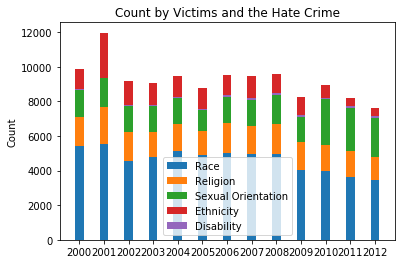

In [24]:
N = 13
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

sexual_orientation_bot = np.array(religion_sum) + np.array(race_sum)
ethnicity_bot = sexual_orientation_bot + np.array(sexual_orientation_sum)
disability_bot = ethnicity_bot + np.array(ethnicity_sum)

p1 = plt.bar(ind, race_sum, width)
p2 = plt.bar(ind, religion_sum, width, bottom = race_sum)
p3 = plt.bar(ind, sexual_orientation_sum, width, bottom = np.array(religion_sum) + np.array(race_sum))
p4 = plt.bar(ind, ethnicity_sum, width, bottom = ethnicity_bot)
p5 = plt.bar(ind, disability_sum, width, bottom = ethnicity_bot)


plt.ylabel('Count')
plt.title('Count by Victims and the Hate Crime')
plt.xticks(ind, ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012'))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Race', 'Religion', 'Sexual Orientation', 'Ethnicity', 'Disability'))

plt.show()

In [25]:
religion_00

,Incidents,Offenses,Victims,Known Offenders
Bias motivation,,,,
"Anti-Jewish ,",1109,1161,1269,405
Anti-Catholic,56,61,63,33
Anti-Protestant,59,62,62,23
Anti-Islamic,28,33,36,20
Anti-Other Religious Group,172,187,210,77
Anti-Multireligious Group,44,46,52,18
Anti-Atheism/Agnosticism/etc.,4,6,7,1


In [26]:
t1_00

,Incidents,Offenses,Victims,Known Offenders
Bias motivation,,,,
Anti-White,875,1050,1080,1169
"Anti-Black ,",2884,3409,3535,2799
Anti-American Indian/Alaskan Native,57,62,64,58
Anti-Asian/Pacific Islander,281,317,339,273
Anti-Multiracial Group,240,333,379,153
"Anti-Jewish ,",1109,1161,1269,405
Anti-Catholic,56,61,63,33
Anti-Protestant,59,62,62,23
Anti-Islamic,28,33,36,20


In [27]:
t1_09.head()

,Incidents,Offenses,Victims,Known Offenders
Bias motivation,,,,
Anti-White,545,652,668,753
Anti-Black,2284,2724,2902,2160
Anti-American Indian/Alaskan Native,65,84,87,88
Anti-Asian/Pacific Islander,126,147,149,108
"Anti-Multiple Races, Group",179,209,251,132


In [48]:
sns.set(style="whitegrid")
clarity_ranking = ["Incidents", "Offenses", "Victims", "Known Offenders"]

sns.boxenplot(x="Bias motivation", y="Offenses", 
              color="b", order=clarity_ranking,
              scale="linear", data=t1_06)

ValueError: Could not interpret input 'Bias motivation'

In [44]:
t1_06

,Incidents,Offenses,Victims,Known Offenders
Bias motivation,,,,
Anti-White,890,1008,1054,1074
Anti-Black,2640,3136,3332,2437
Anti-American Indian/Alaskan Native,60,72,75,72
Anti-Asian/Pacific Islander,181,230,239,181
"Anti-Multiple Races, Group",229,291,320,193
Anti-Jewish,967,1027,1144,362
Anti-Catholic,76,81,86,44
Anti-Protestant,59,62,65,35
Anti-Islamic,156,191,208,147
